In [1]:
from sympy import sqrt, symbols, Eq, init_printing, cos, pi, solveset, S
from sympy.plotting import plot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.spatial.distance import euclidean as dist

init_printing()

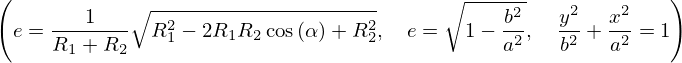

In [2]:
R1, R2, e, a, b, alpha = symbols("R1, R2, e, a, b, alpha")

eq_e1 = Eq(e, sqrt(R1 ** 2 + R2 ** 2 - 2 * R1 * R2 * cos(alpha)) / (R1 + R2))
eq_e2 = Eq(e, sqrt(1 - b ** 2 / a ** 2))

x, y = symbols("x, y")
eq_ells = Eq((x / a) ** 2 + (y / b) ** 2, 1)
eq_ells

eq_e1, eq_e2, eq_ells

In [3]:
f1 = 13.85
f2 = 36.16
angle = pi / 2
dia = 21

temp_a = float((f1 + f2) / 2)
temp_e = float(eq_e1.subs({R1: f1, R2: f2, alpha: angle}).evalf().rhs)
temp_b = float(solveset(eq_e2.subs({a: (f1 + f2) / 2, e: temp_e}), b).args[-1])
temp_A0 = 2 * temp_e * temp_a

temp_a, temp_a*2, temp_e, temp_b, temp_b*2, temp_A0

In [4]:
temp_A0, np.sqrt(f1**2+f2**2), temp_A0/2, np.sqrt(temp_a**2-temp_b**2)

In [5]:
temp_x = (f1 ** 2 - f2 ** 2) / (2 * temp_A0)
solveset(eq_ells.subs({x: temp_x, a: temp_a, b: temp_b}), y).args[-1], np.sqrt(f1**2-(temp_x+temp_A0/2)**2), np.sqrt(f2**2-(temp_x-temp_A0/2)**2)

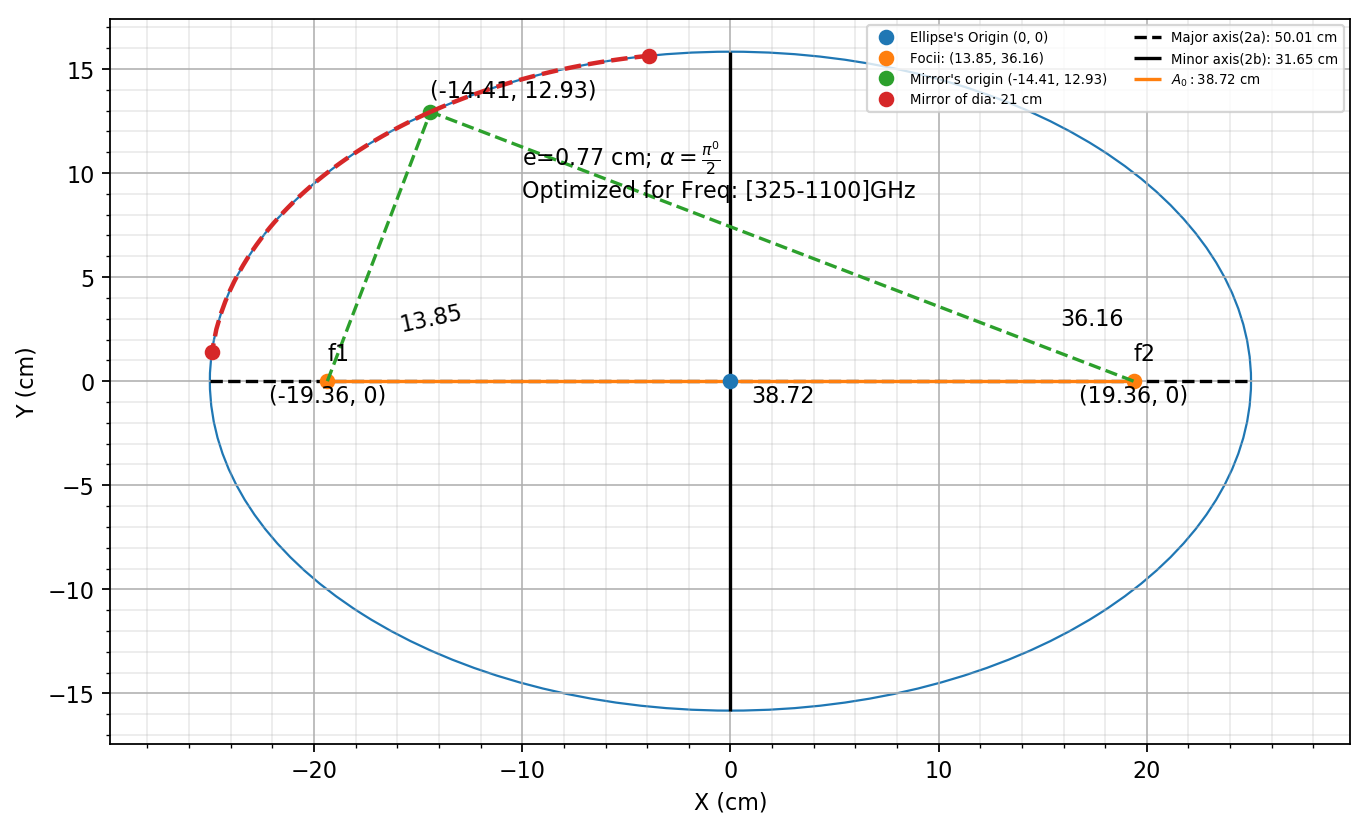

In [11]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=160)

###########################################################################################################
# Defining ellipse
w, h = 2 * temp_a, 2 * temp_b
origin = 0
ells = Ellipse(
    xy=[origin, origin], width=w, height=h, edgecolor="C0", lw=1, facecolor="none"
)

ells.set_clip_box(ax.bbox)
ax.add_artist(ells)
ax.plot(origin, origin, "o", label=f"Ellipse's Origin (0, 0)")

extra_space = 5

ax.hlines(
    0,
    xmin=origin - w / 2,
    xmax=origin + w / 2,
    linestyles="--",
    label=f"Major axis(2a): {w:.2f} cm",
)
ax.vlines(
    0,
    ymin=origin - h / 2,
    ymax=origin + h / 2,
    linestyles="-",
    label=f"Minor axis(2b): {h:.2f} cm",
)

###########################################################################################################

###########################################################################################################
# Distance b/w focii (A0)
ax.hlines(
    0,
    xmin=-temp_A0 / 2,
    xmax=temp_A0 / 2,
    edgecolor="C1",
    label=f"$A_0: ${temp_A0:.2f} cm",
)
ax.plot([-temp_A0 / 2, temp_A0 / 2], [0, 0], "oC1", label=f"Focii: ({f1}, {f2})")

ax.annotate("f1", xy=(-temp_A0 / 2, 0), xytext=(-temp_A0 / 2, 1))
ax.annotate("f2", xy=(temp_A0 / 2, 0), xytext=(temp_A0 / 2, 1))
ax.annotate(f"{temp_A0:.2f}", xy=(0, 0), xytext=(1, -1))

ax.annotate(
    f"({(-temp_A0/2):.2f}, 0)",
    xy=(-temp_A0 / 2, 0),
    xytext=(-temp_A0 / 2, -1),
    ha="center",
)
ax.annotate(
    f"({(temp_A0/2):.2f}, 0)",
    xy=(temp_A0 / 2, 0),
    xytext=(temp_A0 / 2, -1),
    ha="center",
)

###########################################################################################################

###########################################################################################################
# Mirror Portion with beams from focii
temp_x = (f1 ** 2 - f2 ** 2) / (2 * temp_A0)
temp_y = np.sqrt(f1 ** 2 - (temp_x + temp_A0 / 2) ** 2)
ax.plot(temp_x, temp_y, "oC2", label=f"Mirror's origin ({temp_x:.2f}, {temp_y:.2f})")

ax.plot([-temp_A0 / 2, temp_x], [0, temp_y], "--C2")
ax.plot([temp_A0 / 2, temp_x], [0, temp_y], "--C2")

ax.annotate(
    f"{f1}",
    xy=(-temp_A0 / 2, 0),
    xytext=(-temp_A0 / 2 + 5, 3),
    rotation=12,
    ha="center",
    va="center",
)
ax.annotate(
    f"{f2}", xy=(temp_A0 / 2, 0), xytext=(temp_A0 / 2 - 2, 3), ha="center", va="center"
)

ax.annotate(
    f"({temp_x:.2f}, {temp_y:.2f})", xy=(temp_x, temp_y), xytext=(temp_x, temp_y+1), ha="left", va="center"
)
###########################################################################################################

###########################################################################################################
# Mirror portion (with diameter dia)
temp_x2 = np.linspace(temp_x, temp_x + dia / 2)
temp_y2 = np.array(
    [
        float(solveset(eq_ells.subs({x: i, a: temp_a, b: temp_b}), y).args[-1])
        for i in temp_x2
    ]
)

temp_x3 = np.linspace(temp_x, temp_x - dia / 2)
temp_y3 = np.array(
    [
        float(solveset(eq_ells.subs({x: i, a: temp_a, b: temp_b}), y).args[-1])
        for i in temp_x3
    ]
)

ax.plot(temp_x2, temp_y2, "--C3", lw=2)
ax.plot(temp_x3, temp_y3, "--C3", lw=2)
ax.plot(
    [temp_x + dia / 2, temp_x - dia / 2],
    [temp_y2[-1], temp_y3[-1]],
    "oC3",
    lw=2,
    label=f"Mirror of dia: {dia} cm",
)

###########################################################################################################

ax.text(
    -10,
    9,
    f"e={temp_e:.2f} cm; "
    + r"$\alpha=\frac{\pi^0}{2}$"
    + "\nOptimized for Freq: [325-1100]GHz",
)

ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

ax.set(
    xlim=[origin - w / 2 - extra_space, origin + w / 2 + extra_space],
    ylim=[origin - h / 2 - extra_space, origin + h / 2 + extra_space],
    xlabel="X (cm)",
    ylabel="Y (cm)",
)

ax.grid(alpha=0.25, which="minor")
ax.grid(alpha=0.9, which="major")

ax.legend(fontsize=6, ncol=2)
ax.axis('equal')

plt.savefig("./Simulations/Mirror-[60-260]GHz.pdf")
plt.savefig("./Simulations/Mirror-[60-260]GHz.png")

plt.show()

In [ ]:
temp_x3 = np.linspace(temp_x, temp_x - 21 / 2)
for i in temp_x3:
    temp = solveset(eq_ells.subs({x: i, a: temp_a, b: temp_b}), y).args[-1]
    print(temp)
    